<a href="https://colab.research.google.com/github/KacperGrodecki/image_proccessing/blob/main/kuba_analiza_tekstu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
from difflib import SequenceMatcher
import string
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pickle

In [3]:
import pandas as pd

In [4]:
#statistics
def average_word_length(text):
    if isinstance(text, str):
        text=re.sub(r'W+', '',text)
        if len(text.strip())>0:
            total_length = len(text)-text.count(' ')
            num_words = len(text.split())
            return total_length/num_words
        else:
            return 0
    elif text==np.nan:
        return 0
    else:
        average_word_length(str(text))
        
def std(text):
    if isinstance(text, str):
        text=re.sub(r'W+', '',text)
        if len(text.strip())>0:
            total_length = len(text)-text.count(' ')
            num_words = len(text.split())
            avg=total_length/num_words
            words=text.split()
            out=0
            for word in words:
                out+=(len(word)-avg)**2 
            return (out/num_words)**0.5
        else:
            return 0
    elif text==np.nan:
        return 0
    else:
        std(str(text))
        
def longest(text):
    if isinstance(text, str):
        if len(text.strip())>0:
            words=text.split()
            out=0
            for word in words:
                if len(word)>out:
                    out=len(word)
            return out
        else:
            return 0
    elif text==np.nan:
        return 0
    else:
        std(str(text))

In [5]:
#check dictionary correction
'''
string_pl=string.ascii_lowercase+'ąśćęó'

file='drive/MyDrive/kuba/odm.txt'


def make_dict(file):
    with open(file, encoding='UTF8') as f:
        lines = f.readlines()
    dict_pl = []
    for line in lines:
        word=line.split()
        dict_pl.append(word)
 
    return [item.replace(',','') for sublist in dict_pl for item in sublist]

dict_pl=make_dict(file)

def check_pl(text):
    return text in dict_pl 

def dicts_pl():
    dicts=[None]*len(string_pl)
    i=0
    for ch in string_pl:
        dicts[i]=[x for x in dict_pl if x[0]==ch ]
        i+=1
    return dicts
        

dicts=dicts_pl()

key=[None]*len(string_pl)
i=0
for ch in string_pl:
        key[i]=ch
        i+=1

def check_string_pl(a):
    result=0
    a=''.join(filter(whitelist.__contains__, a))
    for word in a.split():
       # print(word,' ',check_pl(word))
        result+=int(check_pl_alfabet(word.lower()))
    if len(a.split())>0:
        return result/len(a.split())
    else:
        return 0

def word_correction(a):
    for word in a.split():
        if len(word)>1:
            if check_string_pl(word.lower())<1:
                for i in range(0,len(word)+1):
                    if i==0:
                        for replace in String_pl:
                            word_new=replace+word[1:]
                            if check_pl_alfabet(word_new):
                                print(word_new)
                    else:
                        for replace in String_pl:
                            word_new=word[:i]+replace+word[i+1:]
                            if check_pl_alfabet(word_new):
                                print(word_new)
'''

"\nstring_pl=string.ascii_lowercase+'ąśćęó'\n\nfile='drive/MyDrive/kuba/odm.txt'\n\n\ndef make_dict(file):\n    with open(file, encoding='UTF8') as f:\n        lines = f.readlines()\n    dict_pl = []\n    for line in lines:\n        word=line.split()\n        dict_pl.append(word)\n \n    return [item.replace(',','') for sublist in dict_pl for item in sublist]\n\ndict_pl=make_dict(file)\n\ndef check_pl(text):\n    return text in dict_pl \n\ndef dicts_pl():\n    dicts=[None]*len(string_pl)\n    i=0\n    for ch in string_pl:\n        dicts[i]=[x for x in dict_pl if x[0]==ch ]\n        i+=1\n    return dicts\n        \n\ndicts=dicts_pl()\n\nkey=[None]*len(string_pl)\ni=0\nfor ch in string_pl:\n        key[i]=ch\n        i+=1\n\ndef check_string_pl(a):\n    result=0\n    a=''.join(filter(whitelist.__contains__, a))\n    for word in a.split():\n       # print(word,' ',check_pl(word))\n        result+=int(check_pl_alfabet(word.lower()))\n    if len(a.split())>0:\n        return result/len(a.s

In [22]:
def char_type_counter(text):
    #print(text)
    if isinstance(text, str):
        dig,alpha=0,0
        for char in text.strip():
            if char.isdigit():
                dig+=1
            elif char.isalpha():
                alpha+=1
        if dig+alpha==0:
            return 0
        else:
            return alpha/(dig+alpha)
    else:
        return 0

def unique_chars_set(s):
    if type(s) ==str:
      return  (len(s)-len(set(s)))/len(s)
    else:
      return 0

In [23]:
labels=pd.read_csv('drive/MyDrive/kuba/tekst.csv',index_col=0)

In [24]:
averages=labels.applymap(lambda x: average_word_length(x))
stds=labels.applymap(lambda x: std(x))
long=labels.applymap(lambda x: longest(x))

In [25]:
labels=pd.read_excel('drive/MyDrive/kuba/concat1.xlsx',index_col=0)

In [37]:
labels=labels[labels['Unnamed: 6']<2]

In [38]:
averages=labels[0].apply(lambda x: average_word_length(x))
stds=labels[0].apply(lambda x: std(x))
long=labels[0].apply(lambda x: longest(x))
char_type_count=labels[0].apply(lambda x: char_type_counter(x))
unique_chars=labels[0].apply(lambda x: unique_chars_set(x))
errors=pd.to_numeric(labels[0].str.contains('ERROR'))

In [39]:
concat=pd.concat([averages,stds,long,char_type_count,unique_chars,errors],axis=1)
concat.fillna(0,inplace=True)

In [40]:
concat.dtypes

0    float64
0    float64
0    float64
0    float64
0    float64
0    float64
dtype: object

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
concat_scaled=scaler.fit_transform(concat.values)

In [44]:
x=concat_scaled
y=labels['Unnamed: 6'].values

In [45]:
print(x.shape)
print(y.shape)

(401, 6)
(401,)


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf = RandomForestClassifier( random_state=0)
clf.fit(x, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y,clf.predict(x))

array([[202,   0],
       [  2, 197]])

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [51]:
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=0)


In [52]:
clf = RandomForestClassifier( random_state=0)
clf.fit(trainX, trainy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [55]:
import matplotlib.pyplot as plt

No Skill: ROC AUC=0.500
RandomForestClassifier: ROC AUC=0.992


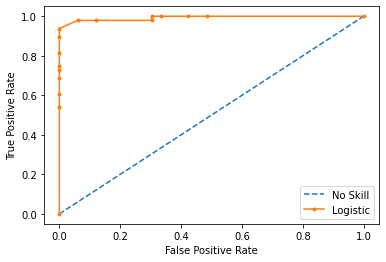

In [57]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = RandomForestClassifier( random_state=0)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RandomForestClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

In [58]:
from joblib import dump
dump(model, 'drive/MyDrive/kuba/model.joblib') 

['drive/MyDrive/kuba/model.joblib']